In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)



In [2]:
EPOCHS = 128
BATCH_SIZE = 32
DEBUG = True

In [3]:
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images,
test_labels) = cifar_dataset.load_data()


Category: [4]


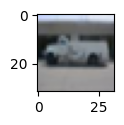

In [4]:
import matplotlib.pyplot as plt
print("Category:", train_labels[10])
plt.figure(figsize=(1, 1))
plt.imshow(train_images[110])
plt.show()

In [5]:
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev
print('mean: ', mean)
print('stddev: ', stddev)
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


mean:  120.70756512369792
stddev:  64.1500758911213


In [7]:
model = Sequential()
model.add(Conv2D(64, (5, 5), strides=(2,2),
activation='relu', padding='same',
input_shape=(32, 32, 3),
kernel_initializer='he_normal',bias_initializer = 'zeros'))
model.add(Conv2D(64, (3, 3), strides=(2,2),
activation='relu', padding='same',
kernel_initializer='he_normal',
bias_initializer='zeros'))
model.add(Flatten())
model.add(Dense(10, activation='softmax',
kernel_initializer='glorot_uniform',
bias_initializer='zeros'))
model.compile(loss='categorical_crossentropy',
optimizer='adam', metrics =['accuracy'])
model.summary() if DEBUG == True else None

C:\Users\madro\OneDrive\Документы\GitHub\Khokhlov_Dimitrii_20221_24\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,762 (323.29 KB)

 Trainable params: 82,762 (323.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
train_images, train_labels, validation_data =
(test_images, test_labels), epochs=EPOCHS,
batch_size=BATCH_SIZE, verbose=2, shuffle=True)

Epoch 1/128
1563/1563 - 8s - 5ms/step - accuracy: 0.5033 - loss: 1.4122 - val_accuracy: 0.5852 - val_loss: 1.1812
Epoch 2/128
1563/1563 - 7s - 4ms/step - accuracy: 0.6214 - loss: 1.0822 - val_accuracy: 0.6237 - val_loss: 1.0705
Epoch 3/128
1563/1563 - 7s - 4ms/step - accuracy: 0.6697 - loss: 0.9475 - val_accuracy: 0.6440 - val_loss: 1.0333
Epoch 4/128
1563/1563 - 6s - 4ms/step - accuracy: 0.7046 - loss: 0.8484 - val_accuracy: 0.6539 - val_loss: 1.0230
Epoch 5/128
1563/1563 - 6s - 4ms/step - accuracy: 0.7336 - loss: 0.7666 - val_accuracy: 0.6517 - val_loss: 1.0398
Epoch 6/128
1563/1563 - 7s - 4ms/step - accuracy: 0.7573 - loss: 0.6958 - val_accuracy: 0.6497 - val_loss: 1.1041
Epoch 7/128
1563/1563 - 7s - 4ms/step - accuracy: 0.7774 - loss: 0.6361 - val_accuracy: 0.6504 - val_loss: 1.1378
Epoch 8/128
1563/1563 - 7s - 5ms/step - accuracy: 0.7976 - loss: 0.5797 - val_accuracy: 0.6453 - val_loss: 1.1899
Epoch 9/128
1563/1563 - 7s - 4ms/step - accuracy: 0.8142 - loss: 0.5324 - val_accuracy: 

KeyboardInterrupt: 

In [ ]:
# import numpy as np
# from sklearn.datasets import load_sample_image
# # Загрузка изображений
# china = load_sample_image("china.jpg") / 255
# flower = load_sample_image("flower.jpg") / 255
# images = np.array([china, flower])
# batch_size, height, width, channels = images.shape
# # Создание 2 фильтров
# filters = np.zeros(shape=(7, 7, channels, 2),
# dtype=np.float32)
# filters[:, 3, :, 0] = 1 # вертикальная линия
# filters[3, :, :, 1] = 1 # горизонтальная линия
# outputs = tf.nn.conv2d(images, filters, strides=1,
# padding="SAME")
# plt.imshow(outputs[0, :, :, 1], cmap="gray")